In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df_datasus = pd.read_csv('datasus.csv', sep=';').convert_dtypes()
df_datasus = df_datasus[~df_datasus['Ano/mes atendimento'].str.contains(r'^\d{4}$')]
meses = {'Janeiro': '01', 'Fevereiro': '02', 'Marco': '03', 'Abril': '04', 'Maio': '05', 'Junho': '06', 
         'Julho': '07', 'Agosto': '08', 'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'}
df_datasus['Ano/mes atendimento'] = df_datasus['Ano/mes atendimento'].replace(meses, regex=True)
df_datasus.drop(df_datasus[df_datasus['Ano/mes atendimento'] == 'Total'].index, inplace=True)
df_datasus['Ano/mes atendimento'] = pd.to_datetime(df_datasus['Ano/mes atendimento'], format='%m/%Y')
df_datasus['Ano'] = df_datasus['Ano/mes atendimento'].dt.year
df_datasus_filtrado = df_datasus[~df_datasus['Ano/mes atendimento'].dt.year.isin([2016, 2017])]
df_datasus_filtrado = df_datasus_filtrado.drop(columns=['Ano/mes atendimento', 'Total'])
df_datasus_filtrado.head(20)

,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Ano
1,48,71,45,18,38,144,83,72,53,38,33,18,2008
2,42,50,44,14,63,126,79,54,48,28,23,13,2008
3,62,81,49,15,53,135,87,70,55,44,28,16,2008
4,52,52,47,27,55,130,87,64,46,34,43,11,2008
5,43,43,35,19,58,121,84,66,57,36,37,21,2008
6,32,40,31,13,53,131,74,63,50,42,42,21,2008
7,38,66,47,19,48,111,85,78,44,47,40,11,2008
8,39,47,38,12,46,91,85,69,50,37,26,21,2008
9,39,45,32,10,35,108,71,68,51,58,37,27,2008
10,36,43,22,15,44,111,73,74,53,40,39,20,2008


Matriz de Covariância:
[[ 0.14634193  0.04367595  0.02537983  0.01017878  0.04649689  0.10236496
   0.03779853  0.00550563 -0.00652299 -0.00915629 -0.01734039 -0.00752463]
 [ 0.04367595  0.22261913  0.11772749  0.05283444  0.144178    0.23943977
   0.11192761  0.1488645   0.07080248  0.01286155  0.03561457  0.00646493]
 [ 0.02537983  0.11772749  0.09820241  0.03313269  0.09458951  0.13595375
   0.07319236  0.10098887  0.04636924  0.01134839  0.02604405  0.00131866]
 [ 0.01017878  0.05283444  0.03313269  0.03459501  0.05515913  0.08429213
   0.04049511  0.06029552  0.03421425  0.01433904  0.01707924  0.0049611 ]
 [ 0.04649689  0.144178    0.09458951  0.05515913  0.23453431  0.27851088
   0.1341543   0.14051128  0.06982214  0.01963934  0.03634646  0.00691001]
 [ 0.10236496  0.23943977  0.13595375  0.08429213  0.27851088  0.6625425
   0.26985943  0.24838932  0.15442618  0.07268441  0.10414     0.01812358]
 [ 0.03779853  0.11192761  0.07319236  0.04049511  0.1341543   0.26985943
   0.31199

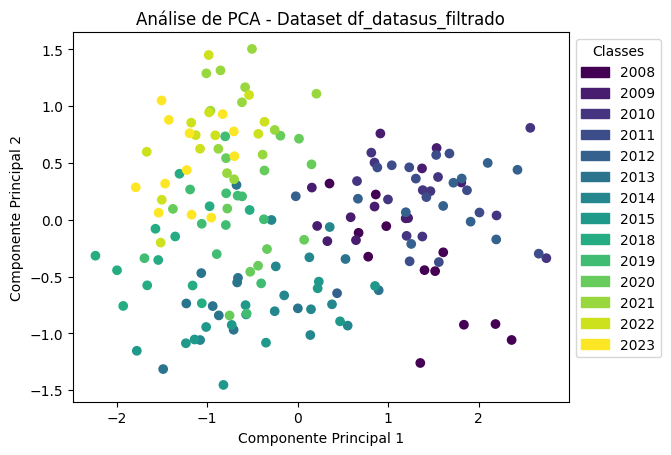

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Extrair dados e rótulos do dataframe
dados = df_datasus_filtrado.iloc[:, :-1].values
rotulos = df_datasus_filtrado.iloc[:, -1].values

# Substituir valores ausentes pela média
imputador = SimpleImputer(strategy='mean')
dados = imputador.fit_transform(dados)

# Normalizar os dados
dados = (dados - np.mean(dados)) / np.std(dados)

# Calcular e exibir a matriz de covariância
matriz_cov = np.cov(dados.T)

# Calcular e exibir autovalores e autovetores
autovalores, autovetores = np.linalg.eig(matriz_cov)

# Ordenar autovalores e autovetores em ordem decrescente
pares_autovalores_vetores = sorted(zip(autovalores, autovetores.T), key=lambda x: -x[0])
maiores_autovalores = [pares_autovalores_vetores[0][0], pares_autovalores_vetores[1][0]]
maiores_autovetores = [pares_autovalores_vetores[0][1], pares_autovalores_vetores[1][1]]

print("Matriz de Covariância:")
print(matriz_cov)
print("\nAutovalores:")
print(autovalores)
print("\nAutovetores:")
print(autovetores)
print("\n Principais autovalores:")
print(maiores_autovalores)
print("\n Principais autovetores:")
print(maiores_autovetores)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados)

# Converter rótulos para valores numéricos
mapa_rotulos = {nome: i for i, nome in enumerate(pd.unique(rotulos))}
rotulos_numericos = np.array([mapa_rotulos[rotulo] for rotulo in rotulos])

# Visualizar os resultados
dispersao = plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=rotulos_numericos, cmap='viridis')

# Adicionar legendas para as classes
legendas_classes = pd.unique(rotulos)
manipuladores = [Patch(color=dispersao.cmap(dispersao.norm(mapa_rotulos[rotulo])), label=rotulo) for rotulo in legendas_classes]
plt.legend(handles=manipuladores, bbox_to_anchor=(1, 1), title="Classes")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA - Dataset df_datasus_filtrado')
plt.show()
